# Introduction: 


At the Infinite House of Pancakes, there are only finitely many pancakes, but there are infinitely many diners who would be willing to eat them!

When the restaurant opens for breakfast, among the infinitely many diners, exactly D have non-empty plates; the ith of these has Pi pancakes on his or her plate. Everyone else has an empty plate.
Normally, every minute, every diner with a non-empty plate will eat one pancake from his or her plate.



### Special minutes: 

Some minutes may be special. In a special minute, the head server asks for the diners' attention, chooses a diner with a non-empty plate, and carefully lifts some number of pancakes off of that diner's plate and moves those pancakes onto one other diner's (empty or non-empty) plate. No diners eat during a special minute, because it would be rude.

### Your job : 
You are the head server on duty this morning, and it is your job to decide which minutes, if any, will be special, and which pancakes will move where. That is, every minute, you can decide to either do nothing and let the diners eat, or declare a special minute and interrupt the diners to make a single movement of one or more pancakes, as described above.

Breakfast ends when there are no more pancakes left to eat. How quickly can you make that happen?

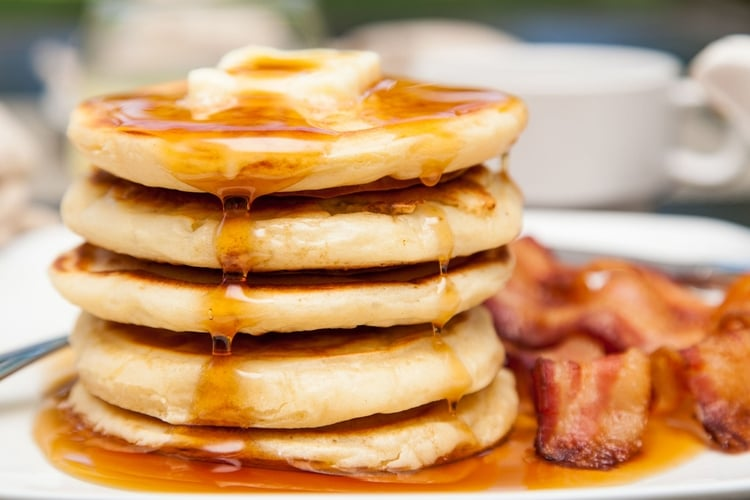

# Your mission:
Your real job as an enigineer now is to code the function `get_minimum_finish_time` that returns the minimum number of minutes to finish all the pancakes. 

### Your input:
Your  input is a list of positive integers. The ith element of your list represents the number of pancakes on a diner's plate.

Example: The list `[2, 4, 5]` represents  3 diners with repectively 2, 4 and 5 pancakes. The rest of diners (infinite) have empty plates.


# Your code:

In [99]:
def special_minute(x, pos):
    """
    """
    res = x[pos:]
    for i, val in enumerate(x[:pos]):
        res += [val//2, val - val//2]
    res.sort(reverse=True)  # todo: insert in sorted list instead of sorting the whole list again
    return res


def get_minimum_finish_time(plates):
    """
    :param: plates: A list of pancakes number on diners plates.
    This function return the number of minimum minutes
    """
    
    # Sort plates
    sorted_plates = plates.copy()
    sorted_plates.sort(reverse=True)
    
    # Initialization
    time = 0
    
    while True:
        
        shift_found = False
        if sum(sorted_plates) == 0:
            # No more pancakes
            return time
        
        else:
            n = len(sorted_plates)
            diff = [sorted_plates[i] - sorted_plates[i + 1] for i in range(n - 1)] + [sorted_plates[-1]]
            # Hypothesis: best split is to split by 2
            potential_gain = [sorted_plates[i] // 2 for i in range(n)]
            gain = [min(diff[i], potential_gain[i]) for i in range(n)]
            
            for i in range(n):
                if gain[i] > i:
                    shift_found = True
                    sorted_plates = special_minute(sorted_plates, i + 1)
                    time += i + 1
                    break
                    
            if not shift_found:
                return time + sorted_plates[0]


# Test your code !!

### Test 1 :

In [100]:
# This cell should print 3 when executed.
print(get_minimum_finish_time([3]))

3


#### Explication: 
one diner starts with 3 pancakes and everyone else's plate is empty. One optimal strategy is:
- Minute 1: Do nothing. The diner will eat one pancake.
- Minute 2 (special): Interrupt and move one pancake from that diner's stack onto another diner's empty plate. (Remember that there are always infinitely many diners with empty plates available, no matter how many diners start off with pancakes.) No pancakes are eaten during an interruption.
- Minute 3: Do nothing. Each of those two diners will eat one of the last two remaining pancakes.

### Test 2 : 

In [101]:
# This cell should print 2 when executed.
print(get_minimum_finish_time([1, 2, 2, 1]))

2


#### Explication: 
it is optimal to do nothing and let your 4 diners eat their pancakes. The second and the third diners will finish in 2 minutes.

### Other tests:

In [102]:
# This cell should print 8 when executed.
print(get_minimum_finish_time([8, 8, 8, 8, 8]))

8


In [103]:
# This cell should print 11 when executed.
print(get_minimum_finish_time([16, 16, 16, 2, 3, 5]))

11


In [104]:
# This cell should print 9 when executed.
print(get_minimum_finish_time([12, 8, 8, 8, 7, 8]))

9


In [105]:
# This cell should print 8 when executed.
print(get_minimum_finish_time([10, 9, 8]))

8


In [106]:
# This cell should print 6 when executed.
print(get_minimum_finish_time([10]))

6


In [107]:
# This cell should print 10 when executed.
print(get_minimum_finish_time([11, 10, 9, 8]))

10
